# Example Notebook for BHPTNRSur1dq1e4, comparison against NRHybSur3dq8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gwtools
from gwtools.gwtools import minimize_norm_error_multi_mode
from gwtools.mismatch import mathcal_E_error_from_mode_dict
# we use NR surrogate models as a proxy for NR
import gwsurrogate
# we use aligned spin model in its non-spinning limit
nrsur = gwsurrogate.LoadSurrogate('NRHybSur3dq8')
import sys
# add the path to the script directory
# provide the path to the BHPTNRSurrogate directory
PATH_TO_BHPTNRSur = "/data/tislam/git/BHPTNRSurrogate"
sys.path.append(PATH_TO_BHPTNRSur+"/surrogates")
import BHPTNRSur1dq1e4 as bhptsur

/opt/jupyter-hub/anaconda3/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/opt/jupyter-hub/anaconda3/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work
Loaded NRHybSur3dq8 model


### 1. Generate NR calibrated waveforms

dict_keys([(2, 2), (2, -2), (2, 1), (2, -1), (3, 1), (3, -1), (3, 2), (3, -2), (3, 3), (3, -3), (4, 2), (4, -2), (4, 3), (4, -3), (4, 4), (4, -4), (5, 3), (5, -3), (5, 4), (5, -4), (5, 5), (5, -5)])


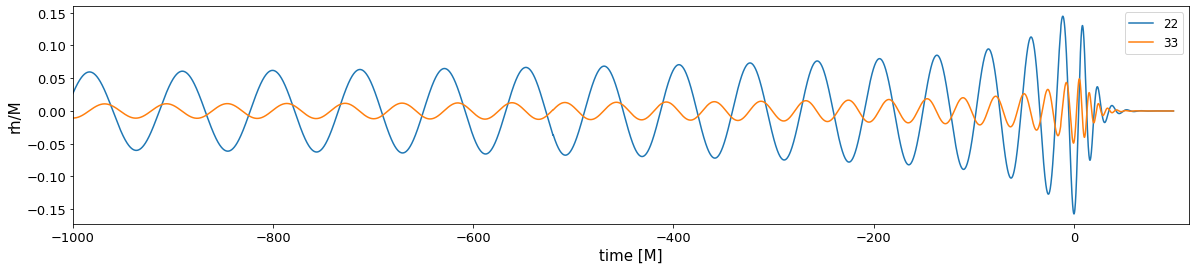

In [2]:
tsur, hsur = bhptsur.generate_surrogate(q_input=8, calibrated=True)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 2. Comparison against NR Surrogate

In [3]:
# wrapper
def generate_nrsur(q_input, f_low=None, t_start=None):
    chiA = [0, 0, 0.0]
    chiB = [0, 0, 0.0]
    dt = 0.1        # step size, Units of M
    if f_low==None:
        f_low=5e-3
    if t_start==None:
        t_start=-5000.1
    # dyn stands for dynamics and is always None for this model
    t, h, dyn = nrsur(q_input, chiA, chiB, dt=dt, f_low=f_low) 
    # we only take the last 5000M long waveform to calibrate
    indx = np.where(t>=t_start)
    t = t[indx]
    for mode in h.keys():
        h[mode] = h[mode][indx]
    return t,h

In [4]:
# generate BHPTNRSur waveform
tsur, hsur = bhptsur.generate_surrogate(q_input=8, calibrated=True)
# generate NR (surrogate) waveform
tnr, hnr = generate_nrsur(q_input=8)

# for demonstration, we will match three representative modes
modelist = [(2,2),(3,3),(4,4)]
# temporary dictionaries for BHPTNR and NR waveforms
hbhpt_tmp = {}
hnr_tmp = {}
for mode in modelist:
    hbhpt_tmp[mode] = hsur[mode]
    hnr_tmp[mode] = hnr[mode]
    
# multi-modal match
[errors_before_min, errors_after_min], [tc, phic], [common_times,h_bhpt_aligned,h_nr_aligned] = \
                            minimize_norm_error_multi_mode(tsur, hbhpt_tmp, tnr, hnr_tmp, mode_list=None, ell_m_match=(2,2),\
                                    t_low_adj=0,t_up_adj=0,method='nelder-mead')

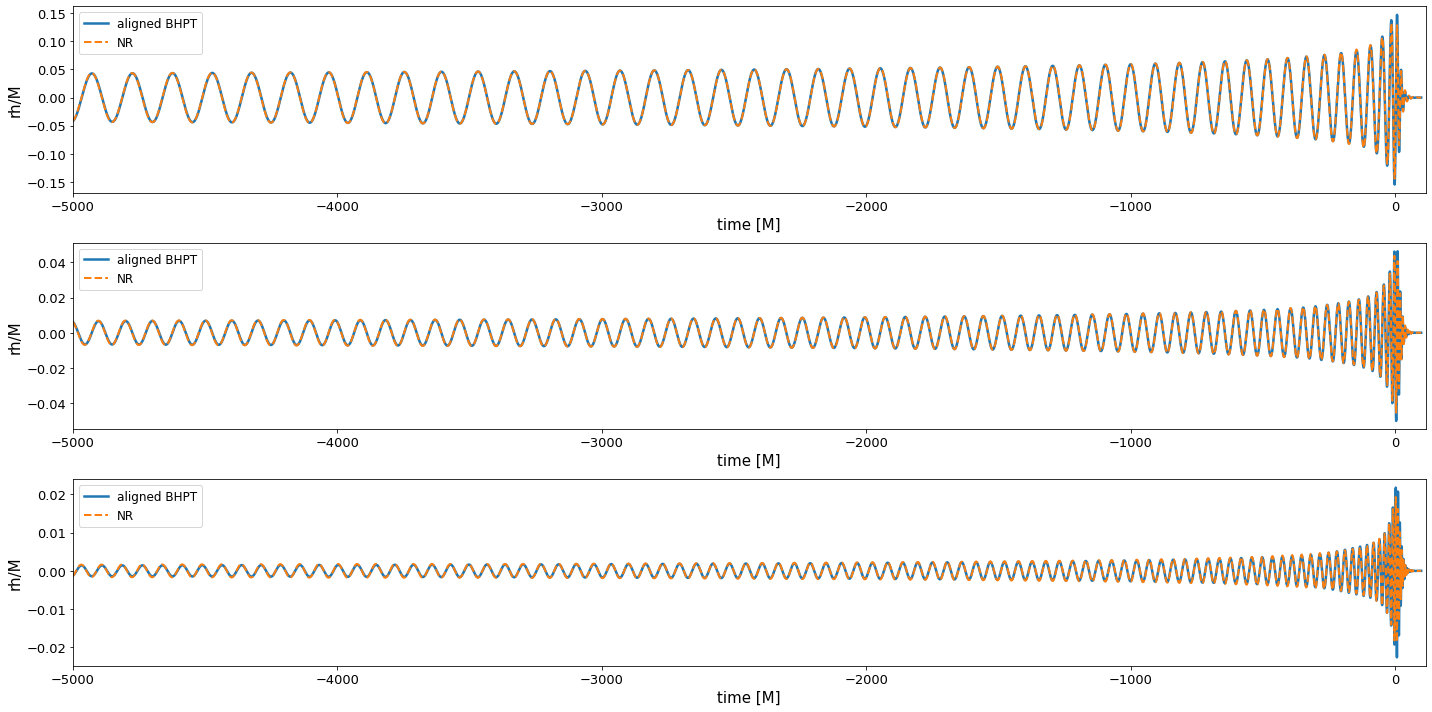

In [5]:
plt.figure(figsize=(20,10))

plt.subplot(311)
plt.plot(common_times, np.real(h_bhpt_aligned[(2,2)]), '-', lw=2.5, label='aligned BHPT')
plt.plot(common_times, np.real(h_nr_aligned[(2,2)]), '--', lw=2.0, label='NR')
plt.xlim(-5000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)

plt.subplot(312)
plt.plot(common_times, np.real(h_bhpt_aligned[(3,3)]), '-', lw=2.5, label='aligned BHPT')
plt.plot(common_times, np.real(h_nr_aligned[(3,3)]), '--', lw=2.0, label='NR')
plt.xlim(-5000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)

plt.subplot(313)
plt.plot(common_times, np.real(h_bhpt_aligned[(4,4)]), '-', lw=2.5, label='aligned BHPT')
plt.plot(common_times, np.real(h_nr_aligned[(4,4)]), '--', lw=2.0, label='NR')
plt.xlim(-5000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()